# Podstawy Hydrodynamiki - ćwiczenia 11
### Dominik Stańczak

In [30]:
from sympy import *
from sympy.plotting import plot3d
init_printing()

In [31]:
x, y = symbols('x y', real=True)
z1, z2, z3, z = symbols('z1 z2 z3 z', complex=True)
gamma, a, Lambda, alpha, U = symbols('Gamma a lambda alpha U', real=True)

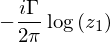

In [79]:
# czynnik_od_oplywu = U * (z1 + (a+Lambda)**2/z1)
czynnik_od_oplywu = 0
wir_liniowy = - I*gamma/(2 * pi) * log(z1)
bezwirowy_wokol_walca =  czynnik_od_oplywu + wir_liniowy
bezwirowy_wokol_walca

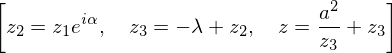

In [80]:
przejscia = [
    Eq(z2,z1 * exp(I*alpha)),
    Eq(z3, z2-Lambda),
    Eq(z, z3 + a**2 / z3),
]
przejscia

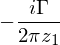

In [81]:
predkosc = bezwirowy_wokol_walca.diff(z1) # w przestrzeni z1
predkosc_zrodlowa = predkosc.copy()
predkosc

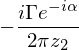

In [82]:
z1_wyliczone = solve(przejscia[0],z1)[0]
predkosc *= (z1_wyliczone).diff(z2) #z1 do z2
predkosc.subs({z1:z2})

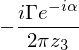

In [83]:
z2_wyliczone = solve(przejscia[1],z2)[0]
predkosc *= (z2_wyliczone).diff(z3) #z2 do z3
predkosc.subs({z1:z3}) # dz2/dz3 = 1 więc dostajemy to samo

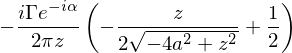

In [84]:
z3_wyliczone = solve(przejscia[2],z3)[0]
predkosc *= (z3_wyliczone).diff(z) #z3 do z
predkosc = predkosc.subs({z1:z})
predkosc

Powyżej: prędkość przepływu wokół symetrycznego profilu Żukowskiego pod kątem natarcia $\alpha$, w płaszczyźnie z.

# b) Prędkość w zależności od prędkości przepływu wokół walca

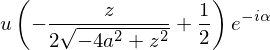

In [87]:
u = symbols('u', complex=True)
predkosc.subs({predkosc_zrodlowa.subs({z1:z}):u})

# c) Cyrkulacja
Warunek Żukowskiego rozumiem tu jako $F_L = \rho U \Gamma$

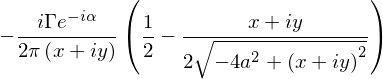

In [88]:
predkosc_zukowski = predkosc.subs({z:x+I*y})
predkosc_zukowski

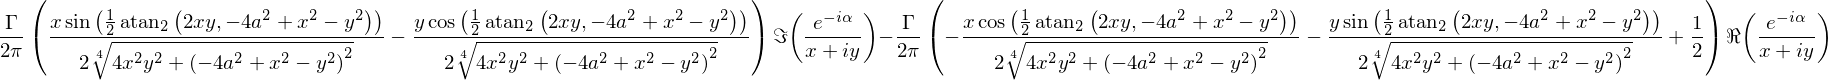

In [89]:
vx = re(predkosc_zukowski)
vy = im(predkosc_zukowski)
vy

I teraz, żeby spełnić $F_L = \rho U \Gamma$, powinienem chyba scałkować $\rho v_y dS$ po konturze ciała. Jak?

In [90]:
mianownik = denom(predkosc.factor())
mianownik

# Wykresy

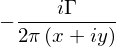

In [91]:
predkosc = bezwirowy_wokol_walca.diff(z1).subs({z1:x+I*y})
predkosc

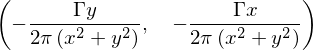

In [92]:
u, v = re(predkosc), im(predkosc)
u, v

<IPython.core.display.Javascript object>


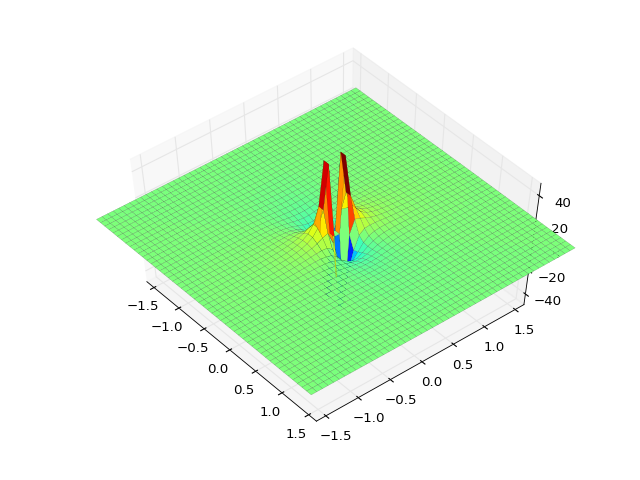

<IPython.core.display.Javascript object>


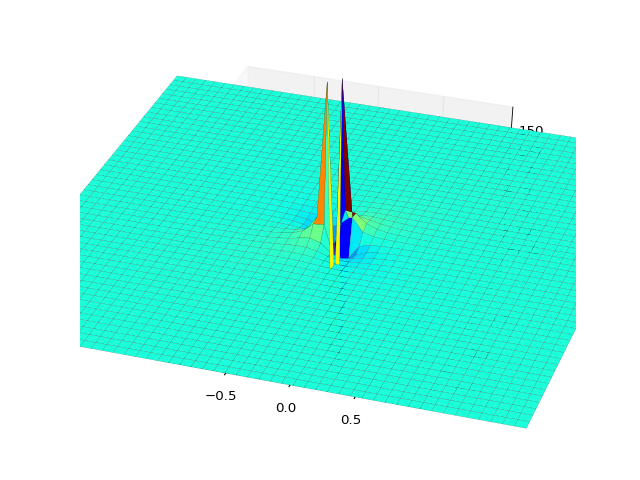

In [75]:
%matplotlib notebook
wartosci = {U:1, a:1, Lambda:1/10}
plot3d(u.subs(wartosci), (x, -2, 2), (y, -2, 2))
plot3d(v.subs(wartosci), (x, -2, 2), (y, -2, 2))

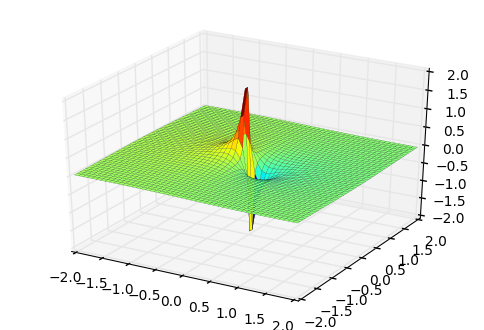

In [50]:
plot3d(v, (x, -2, 2), (y, -2, 2))